In [20]:
#Package(s) for Operating Systems
import os

#Package(s) for Data Importing & Manipulations
import numpy as np
import pandas as pd
import datetime as dt
import pandas_profiling as pp
import re

#Packages for Statistic Analysis
import scipy.stats as stats
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

#Packages for Model Building Part
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import sklearn.feature_selection as feature_selection

#Packages for building models
import statsmodels as st
import statsmodels.formula.api as smp
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


C:\Users\vishalk\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [21]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [23]:
Y_df = train.SalePrice
Y_df.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [24]:
train_df = train.columns.difference(['SalePrice'])
train_df

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [25]:
df = train.append(test,ignore_index=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [26]:
df.rename(columns={'1stFlrSF':'FrstFlrSF','2ndFlrSF':'SndFlrSF','3SsnPorch':'SsnPorch'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [27]:
df.drop(columns=['Alley','LotFrontage','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace=True)
dict(df.dtypes)

{'Id': dtype('int64'),
 'MSSubClass': dtype('int64'),
 'MSZoning': dtype('O'),
 'LotArea': dtype('int64'),
 'Street': dtype('O'),
 'LotShape': dtype('O'),
 'LandContour': dtype('O'),
 'Utilities': dtype('O'),
 'LotConfig': dtype('O'),
 'LandSlope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition1': dtype('O'),
 'Condition2': dtype('O'),
 'BldgType': dtype('O'),
 'HouseStyle': dtype('O'),
 'OverallQual': dtype('int64'),
 'OverallCond': dtype('int64'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'RoofStyle': dtype('O'),
 'RoofMatl': dtype('O'),
 'Exterior1st': dtype('O'),
 'Exterior2nd': dtype('O'),
 'MasVnrType': dtype('O'),
 'MasVnrArea': dtype('float64'),
 'ExterQual': dtype('O'),
 'ExterCond': dtype('O'),
 'Foundation': dtype('O'),
 'BsmtQual': dtype('O'),
 'BsmtCond': dtype('O'),
 'BsmtExposure': dtype('O'),
 'BsmtFinType1': dtype('O'),
 'BsmtFinSF1': dtype('float64'),
 'BsmtFinType2': dtype('O'),
 'BsmtFinSF2': dtype('float64'),
 'BsmtUnfSF': dtype('float64

In [29]:
cont_vars = [key for key in dict(df.dtypes)if dict(df.dtypes) [key] in  ['float64', 'int64', 'float32', 'int32']]
cat_vars = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

df_cat = df[cat_vars]
df_num = df[cont_vars]

In [30]:
def outlier_miss_treat(x):
    x = x.clip(upper = x.quantile(0.95))
    x = x.clip(lower = x.quantile(0.05))
    x = x.fillna(x.median())
    return (x)

df_num = df_num.apply(outlier_miss_treat)
df_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,146.9,60,8450.0,7,5,2003,2003,196.0,706.0,0.0,...,0,61.0,0,0,0,0,0,2,2008,208500.0
1,146.9,20,9600.0,6,8,1976,1976,0.0,978.0,0.0,...,298,0.0,0,0,0,0,0,5,2007,181500.0
2,146.9,60,11250.0,7,5,2001,2002,162.0,486.0,0.0,...,0,42.0,0,0,0,0,0,9,2008,223500.0
3,146.9,70,9550.0,7,5,1915,1970,0.0,216.0,0.0,...,0,35.0,176,0,0,0,0,2,2006,140000.0
4,146.9,60,14260.0,8,5,2000,2000,350.0,655.0,0.0,...,192,84.0,0,0,0,0,0,11,2008,250000.0


In [31]:
df_num.columns


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'FrstFlrSF', 'SndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [32]:
df_num = df_num.loc[:,['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'FrstFlrSF', 'SndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']]

In [33]:
def missing_cat(x):
    x = x.fillna(x.mode().iloc[0])
    return x

df_cat = df_cat.apply(missing_cat)
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [34]:
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first=True)
df_cat_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
df = pd.concat([df_num,df_cat_dummies],axis=1)
df.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FrstFlrSF,SndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0,1710.0,...,0,0,0,0,1,0,0,0,1,0
1,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0,1786.0,...,0,0,0,0,1,0,0,0,1,0
3,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0,1717.0,...,0,0,0,0,1,0,0,0,0,0
4,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0,2198.0,...,0,0,0,0,1,0,0,0,1,0


C:\Users\vishalk\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

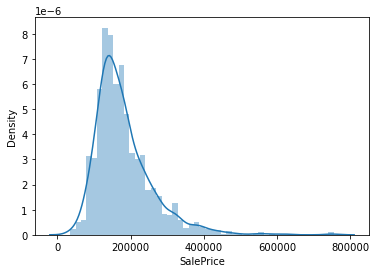

In [39]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(Y_df)

C:\Users\vishalk\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

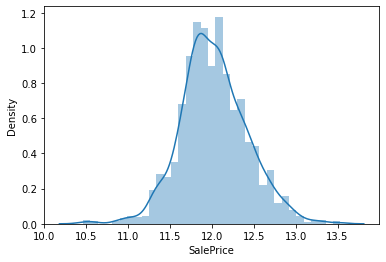

In [40]:
sns.distplot(np.log(Y_df))

In [41]:
df_Ylog = np.log(Y_df)
df_Ylog

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [42]:
df_Ylog = df_Ylog.rename('ln_SalePrice')
df_Ylog

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: ln_SalePrice, Length: 1460, dtype: float64

In [43]:
df_num = df_num.loc[:,['LotArea',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'FrstFlrSF', 'SndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
       'ScreenPorch', 'MiscVal']]

corrm=df_num.corr()
corrm.to_excel('corrm.xlsx')
corrm


,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FrstFlrSF,SndFlrSF,GrLivArea,BsmtFullBath,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
LotArea,1.000000,0.178435,0.204066,0.078204,0.067611,0.354347,0.440651,0.060874,0.409727,0.109079,...,0.365438,0.324908,0.050288,0.314782,0.348862,0.185045,0.156186,0.006537,0.086742,NaN
MasVnrArea,0.178435,1.000000,0.274156,-0.026399,0.073055,0.384985,0.386781,0.089173,0.374121,0.155930,...,0.270329,0.279444,0.265091,0.382545,0.377022,0.182645,0.174777,-0.139346,0.071312,NaN
BsmtFinSF1,0.204066,0.274156,1.000000,-0.039954,-0.521793,0.460556,0.384079,-0.185678,0.133771,0.652154,...,0.004100,0.273867,0.174148,0.245285,0.279564,0.224120,0.099040,-0.112448,0.097503,NaN
BsmtFinSF2,0.078204,-0.026399,-0.039954,1.000000,-0.258777,0.060690,0.059920,-0.113623,-0.054265,0.154339,...,-0.068489,0.041966,-0.093928,-0.043156,-0.012149,0.075758,-0.032221,0.022661,0.057461,NaN
BsmtUnfSF,0.067611,0.073055,-0.521793,-0.258777,1.000000,0.403793,0.293519,0.003978,0.234496,-0.405619,...,0.245508,0.005482,0.167019,0.174132,0.151155,-0.038969,0.135090,0.004369,-0.055463,NaN
TotalBsmtSF,0.354347,0.384985,0.460556,0.060690,0.403793,1.000000,0.842872,-0.281351,0.400972,0.307971,...,0.264510,0.324741,0.354939,0.467761,0.491716,0.228215,0.249130,-0.120039,0.078358,NaN
FrstFlrSF,0.440651,0.386781,0.384079,0.059920,0.293519,0.842872,1.000000,-0.302894,0.504096,0.245750,...,0.358952,0.394920,0.263788,0.458574,0.488058,0.221059,0.221974,-0.100533,0.105506,NaN
SndFlrSF,0.060874,0.089173,-0.185678,-0.113623,0.003978,-0.281351,-0.302894,1.000000,0.643851,-0.174339,...,0.573122,0.159908,0.090620,0.165197,0.113631,0.076583,0.195268,0.040692,-0.002625,NaN
GrLivArea,0.409727,0.374121,0.133771,-0.054265,0.234496,0.400972,0.504096,0.643851,1.000000,0.035831,...,0.809443,0.460041,0.284601,0.504109,0.480387,0.239605,0.351562,-0.026500,0.078108,NaN
BsmtFullBath,0.109079,0.155930,0.652154,0.154339,-0.405619,0.307971,0.245750,-0.174339,0.035831,1.000000,...,-0.058848,0.164609,0.150965,0.161288,0.189562,0.172789,0.090361,-0.071482,0.061173,NaN


<AxesSubplot:>

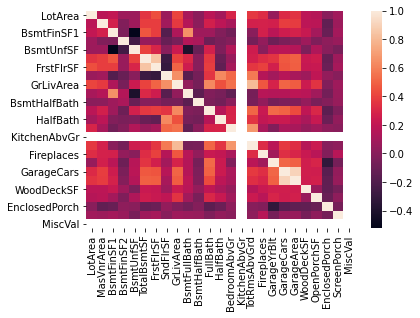

In [44]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(df_num.corr())

In [51]:
df = df.T
features = df[df.columns.difference(['SalePrice'])]
target = df_Ylog

target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: ln_SalePrice, Length: 1460, dtype: float64

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
### Initlaize the Linear Regression Model

lm = LinearRegression()
lm

LinearRegression()

In [53]:
### Initlalzing the RFE Model

rfe = RFE(lm, n_features_to_select=10)

## Fit the RFE Model
rfe = rfe.fit(features, target)

rfe.get_support()

ValueError: Found input variables with inconsistent numbers of samples: [225, 1460]